#Team Members:
  - Raghad Alamoudi
  - Ashjan Aljbreen
  
# Weather Prediction using Neural Networks

## Introduction

In this project, we aim to predict whether it will rain tomorrow based on various weather features using neural networks. We will explore a dataset containing weather data from various locations in Australia.

Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

## 1. Data Loading

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential

from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dense, Dropout

# Displaying Entire Dataset
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)
%matplotlib inline
sns.set()

In [6]:
# Load the dataset
df = pd.read_csv("/content/weatherAUS.csv")

## 2. Data Exploration

In [7]:
# Display the first few rows of the dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
# Display the shape of the dataframe
df.shape

(145460, 23)

In [9]:
print(df.describe())

             MinTemp        MaxTemp       Rainfall   Evaporation      Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm    Humidity9am    Humidity3pm   Pressure9am    Pressure3pm      Cloud9am      Cloud3pm        Temp9am       Temp3pm
count  143975.000000  144199.000000  142199.000000  82670.000000  75625.000000  135197.000000  143693.000000  142398.000000  142806.000000  140953.000000  130395.00000  130432.000000  89572.000000  86102.000000  143693.000000  141851.00000
mean       12.194034      23.221348       2.360918      5.468232      7.611178      40.035230      14.043426      18.662657      68.880831      51.539116    1017.64994    1015.255889      4.447461      4.509930      16.990631      21.68339
std         6.398495       7.119049       8.478060      4.193704      3.785483      13.607062       8.915375       8.809800      19.029164      20.795902       7.10653       7.037414      2.887159      2.720357       6.488753       6.93665
min        -8.500000      -4.800000     

In [10]:
# Display information about columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [11]:
# Check for missing values
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<Axes: >

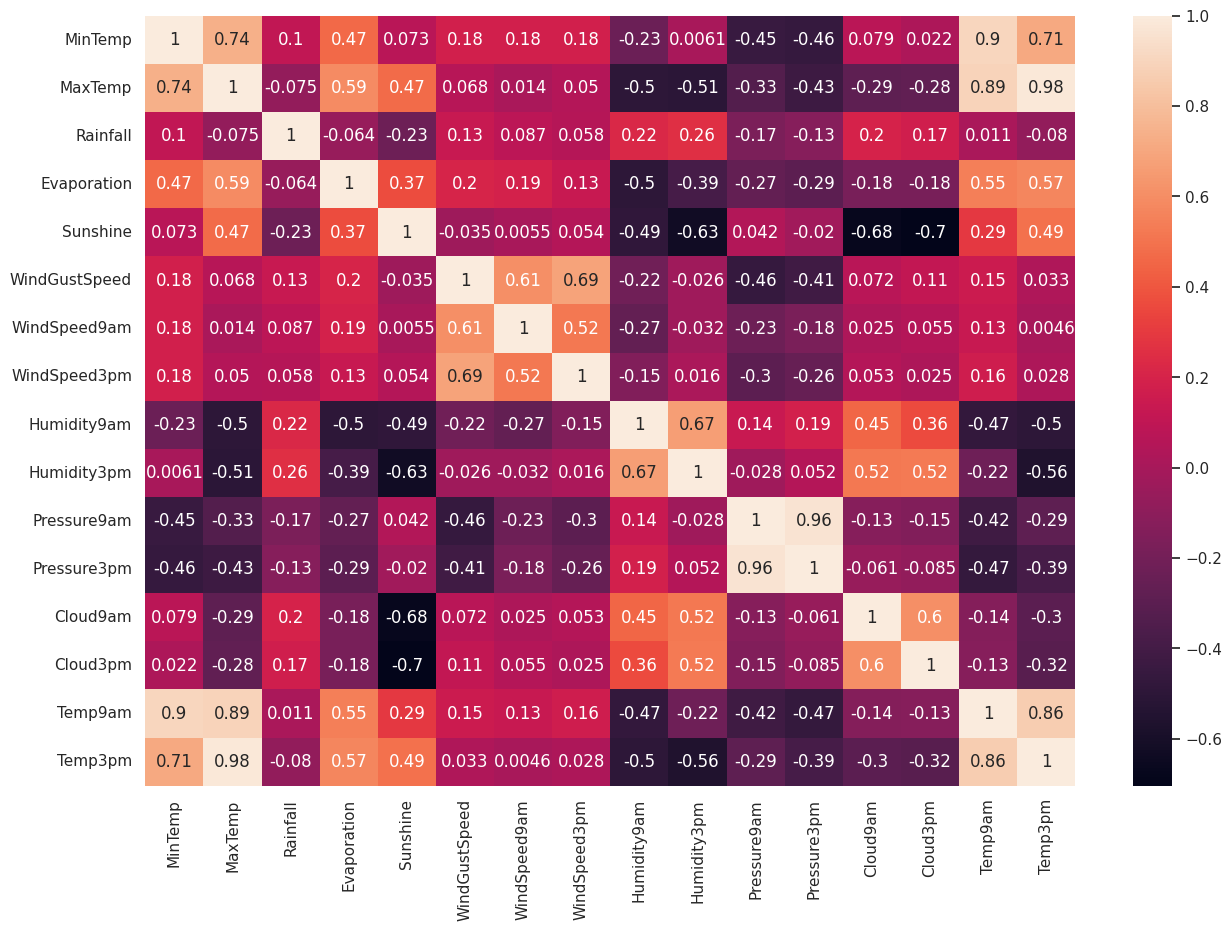

In [12]:
# Create a heatmap to visualize the correlation between numerical variables
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

## 3. Data Preprocessing

In [13]:
# Extract features from the Date column
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop(['Date'], axis=1, inplace=True)

#### Imputing Numerical Columns:
- We first identify numerical columns with missing values.
- For each numerical column, we fill missing values with the median of the column using the `fillna()` method.


In [14]:
# Impute missing values for numerical columns
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                  'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                  'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

numerical_imputer = SimpleImputer(strategy='median')
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])


# Impute missing values for categorical columns
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

In [15]:
# Drop rows with missing target values
df.dropna(subset=['RainTomorrow'], inplace=True)

In [16]:
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [17]:
df = pd.get_dummies(df, columns= ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], drop_first=True, dtype=int)
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.4,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.4,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.4,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.4,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.4,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,3.5,21.8,0.0,4.8,8.4,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,No,No,2017,6,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
145455,2.8,23.4,0.0,4.8,8.4,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,2

In [18]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'RainToday' and 'RainTomorrow' columns
df['RainToday'] = label_encoder.fit_transform(df['RainToday'])
df['RainTomorrow'] = label_encoder.transform(df['RainTomorrow'])

In [19]:
print(df['RainTomorrow'].value_counts())

RainTomorrow
0    110316
1     31877
Name: count, dtype: int64


In [20]:
from sklearn.utils import resample, shuffle
majority_class = df[df['RainTomorrow']==0]
minority_class= df[df['RainTomorrow']==1]

oversampled_df = resample(minority_class, replace=True, n_samples= majority_class.shape[0])

df= pd.concat([majority_class, oversampled_df])
df= shuffle(df)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
55656,1.8,9.7,0.4,4.8,8.4,37.0,15.0,24.0,99.0,73.0,1022.0,1017.2,8.0,8.0,5.1,8.7,0,1,2010,6,8,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
37430,1.8,16.6,0.0,2.4,9.6,28.0,6.0,17.0,75.0,42.0,1021.8,1019.6,1.0,2.0,8.5,16.1,0,0,2011,7,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
30609,15.1,23.2,0.0,2.8,8.4,39.0,9.0,19.0,72.0,58.0,1025.5,1022.3,1.0,3.0,19.6,21.8,0,0,2009,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
123462,9.6,18.4,2.0,1.8,4.2,43.0,0.0,15.0,97.0,61.0,1017.7,1016.4,8.0,7.0,11.7,16.9,1,1,2016,6,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
101812,10.5,14.0,1.6,0.8,0.2,17.0,11.0,11.0,97.0,86.0,1017.4,1014.6,8.0,8.0,11.4,13.2,1,0,2015,6,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [21]:
df.shape

(220632, 114)

In [22]:
X= df.drop('RainTomorrow', axis=1)
y= df['RainTomorrow']

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif

skb= SelectKBest(score_func= f_classif, k=15)
X_new= skb.fit_transform(X, y)

X_new.shape

(220632, 15)

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler =StandardScaler()

X_train, X_test, y_train, y_test= train_test_split(X_new,y,test_size=0.2, stratify=y)
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

## 4. Model Training & Evaluation

In [25]:
# Define multiple models
models = []

### 4.1 Model 1: (**Accuracy: 79%**)

In [26]:
# Build the neural network model
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history1 = model1.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=1)
models.append((model1, history1))

Epoch 1/20
2207/2207 [==============================] - 14s 4ms/step - loss: 0.5036 - accuracy: 0.7593 - val_loss: 0.4589 - val_accuracy: 0.7803
Epoch 2/20
2207/2207 [==============================] - 10s 4ms/step - loss: 0.4765 - accuracy: 0.7775 - val_loss: 0.4519 - val_accuracy: 0.7843
Epoch 3/20
2207/2207 [==============================] - 9s 4ms/step - loss: 0.4706 - accuracy: 0.7791 - val_loss: 0.4487 - val_accuracy: 0.7867
Epoch 4/20
2207/2207 [==============================] - 9s 4ms/step - loss: 0.4683 - accuracy: 0.7821 - val_loss: 0.4478 - val_accuracy: 0.7869
Epoch 5/20
2207/2207 [==============================] - 9s 4ms/step - loss: 0.4662 - accuracy: 0.7834 - val_loss: 0.4462 - val_accuracy: 0.7886
Epoch 6/20
2207/2207 [==============================] - 9s 4ms/step - loss: 0.4650 - accuracy: 0.7840 - val_loss: 0.4460 - val_accuracy: 0.7886
Epoch 7/20
2207/2207 [==============================] - 10s 5ms/step - loss: 0.4634 - accuracy: 0.7835 - val_loss: 0.4477 - val_accura

In [27]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1024      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# Evaluate the model on test set
test_loss, test_acc = model1.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Test Loss: 0.437644898891449
Test Accuracy: 0.7942302823066711


In [29]:
# Predict probabilities on test set
y_pred_prob = model1.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred_binary))

1379/1379 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.79      0.79     22063
           1       0.79      0.80      0.80     22064

    accuracy                           0.79     44127
   macro avg       0.79      0.79      0.79     44127
weighted avg       0.79      0.79      0.79     44127



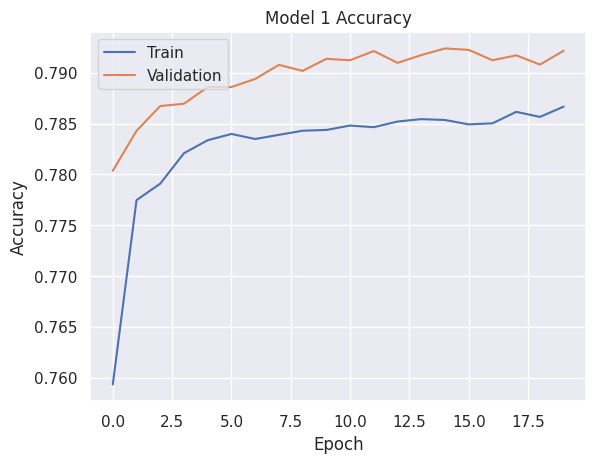

In [30]:
# Plot training & validation accuracy values for Model 1
plt.plot(models[0][1].history['accuracy'])
plt.plot(models[0][1].history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### 4.2 Model 2 (**Accuarcy 87%**)

In [31]:
# Model 2
model2 = Sequential()
model2.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

early_stopping= EarlyStopping(patience=15, monitor='val_loss', min_delta=0.001)

# Train the model
history2 = model2.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)
models.append((model2, history2))

Epoch 1/100
4413/4413 [==============================] - 26s 6ms/step - loss: 0.4554 - accuracy: 0.7828 - val_loss: 0.4487 - val_accuracy: 0.7869
Epoch 2/100
4413/4413 [==============================] - 20s 5ms/step - loss: 0.4425 - accuracy: 0.7905 - val_loss: 0.4382 - val_accuracy: 0.7918
Epoch 3/100
4413/4413 [==============================] - 17s 4ms/step - loss: 0.4351 - accuracy: 0.7949 - val_loss: 0.4314 - val_accuracy: 0.7965
Epoch 4/100
4413/4413 [==============================] - 18s 4ms/step - loss: 0.4290 - accuracy: 0.7977 - val_loss: 0.4264 - val_accuracy: 0.7991
Epoch 5/100
4413/4413 [==============================] - 16s 4ms/step - loss: 0.4222 - accuracy: 0.8020 - val_loss: 0.4245 - val_accuracy: 0.8026
Epoch 6/100
4413/4413 [==============================] - 17s 4ms/step - loss: 0.4159 - accuracy: 0.8050 - val_loss: 0.4207 - val_accuracy: 0.8048
Epoch 7/100
4413/4413 [==============================] - 18s 4ms/step - loss: 0.4096 - accuracy: 0.8082 - val_loss: 0.4193 -

In [32]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               4096      
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 45313 (177.00 KB)
Trainable params: 45313 (177.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
# Evaluate the model on test set
test_loss, test_acc = model2.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

Test Loss: 0.5642678737640381
Test Accuracy: 0.8711220026016235


In [34]:
# Predict probabilities on test set
y_pred_prob = model2.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred_binary))

1379/1379 [==============================] - 2s 2ms/step
              precision    recall  f1-score   support

           0       0.90      0.83      0.87     22063
           1       0.85      0.91      0.88     22064

    accuracy                           0.87     44127
   macro avg       0.87      0.87      0.87     44127
weighted avg       0.87      0.87      0.87     44127



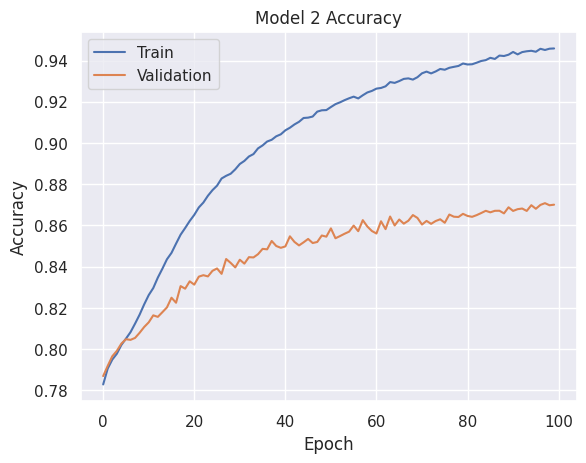

In [35]:
# Plot training & validation accuracy values for Model 2
plt.plot(models[1][1].history['accuracy'])
plt.plot(models[1][1].history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### 4.3 Model 3: (**Accuarcy: 90% - Best Results**)

In [38]:
model3= Sequential()

model3.add(Dense(1024, activation='relu', input_dim= X_new.shape[1]))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(256, activation='relu'))
# model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))

early_stopping= EarlyStopping(patience=15, monitor='val_loss', min_delta=0.001)

model3.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

history3 = model3.fit(X_train, np.array(y_train), validation_split=0.1,batch_size=100, epochs=100, verbose=1)
models.append((model3, history3))

Epoch 1/100
1589/1589 [==============================] - 9s 5ms/step - loss: 0.4547 - accuracy: 0.7841 - val_loss: 0.4434 - val_accuracy: 0.7912
Epoch 2/100
1589/1589 [==============================] - 6s 4ms/step - loss: 0.4411 - accuracy: 0.7913 - val_loss: 0.4352 - val_accuracy: 0.7937
Epoch 3/100
1589/1589 [==============================] - 7s 4ms/step - loss: 0.4333 - accuracy: 0.7962 - val_loss: 0.4256 - val_accuracy: 0.8009
Epoch 4/100
1589/1589 [==============================] - 6s 4ms/step - loss: 0.4251 - accuracy: 0.7992 - val_loss: 0.4298 - val_accuracy: 0.7964
Epoch 5/100
1589/1589 [==============================] - 7s 4ms/step - loss: 0.4172 - accuracy: 0.8045 - val_loss: 0.4179 - val_accuracy: 0.8022
Epoch 6/100
1589/1589 [==============================] - 6s 4ms/step - loss: 0.4072 - accuracy: 0.8092 - val_loss: 0.4093 - val_accuracy: 0.8086
Epoch 7/100
1589/1589 [==============================] - 7s 4ms/step - loss: 0.3946 - accuracy: 0.8163 - val_loss: 0.4054 - val_ac

KeyboardInterrupt: 

In [ ]:
model3.summary()

In [ ]:
# Evaluate the model on test set
test_loss, test_acc = model3.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

In [ ]:
# Predict probabilities on test set
y_pred_prob = model3.predict(X_test)

# Convert probabilities to binary predictions
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred_binary))

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values for Model 3
plt.plot(models[2][1].history['accuracy'])
plt.plot(models[2][1].history['val_accuracy'])
plt.title('Model 3 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()